In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



In [2]:
# Load the events dataset

events = pd.read_csv('events.csv')

# Display basic information about the dataset
print("Dataset shape:", events.shape)
print("\nFirst few rows:")
print(events.head())
print("\nColumn types:")
print(events.dtypes)
print("\nDataset info:")
print(events.info())

# Convert timestamp to datetime
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events['hour'] = events['datetime'].dt.hour

print("\nEvent types in dataset:")
print(events['event'].value_counts())

Dataset shape: (2756101, 5)

First few rows:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Column types:
timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
None

Event types in dataset:
event
view           2664312
addtocart    

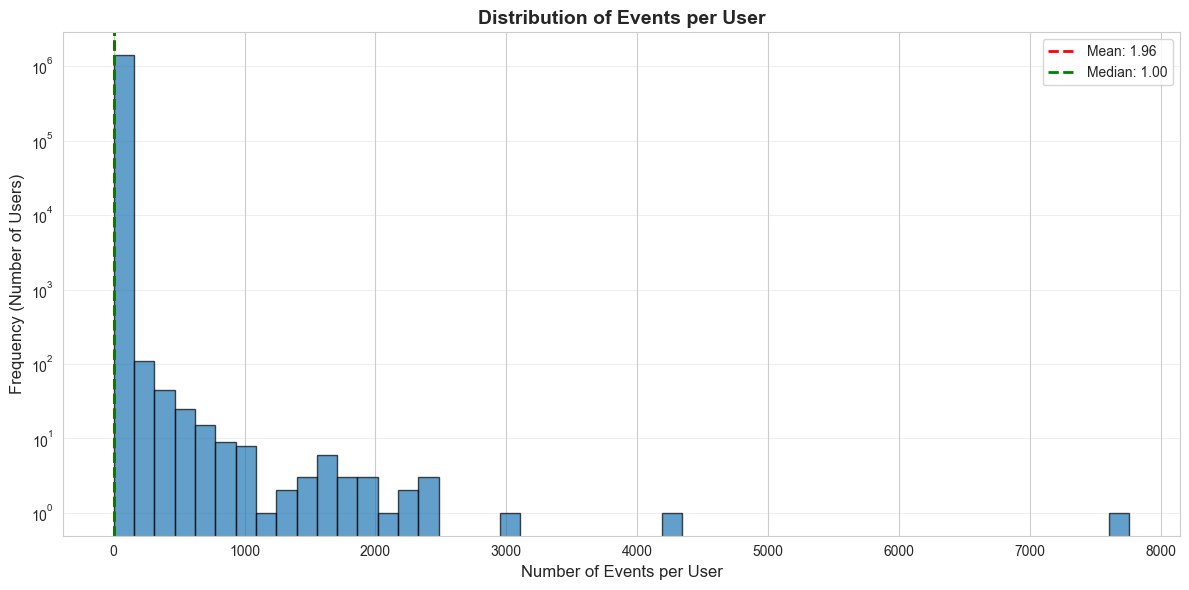


Events per User Statistics:
Total unique users: 1,407,580
Mean events per user: 1.96
Median events per user: 1.00
Min events: 1
Max events: 7757
Std deviation: 12.58


In [3]:
#  EVENTS PER USER - Understanding user activity distribution

# Count events per user
events_per_user = events.groupby('visitorid').size().reset_index(name='event_count')

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(events_per_user['event_count'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Events per User', fontsize=12)
plt.ylabel('Frequency (Number of Users)', fontsize=12)
plt.title('Distribution of Events per User', fontsize=14, fontweight='bold')
plt.yscale('log')  # Using log scale as distribution is likely very skewed
plt.grid(axis='y', alpha=0.3)

# Add statistics
mean_events = events_per_user['event_count'].mean()
median_events = events_per_user['event_count'].median()
plt.axvline(mean_events, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_events:.2f}')
plt.axvline(median_events, color='green', linestyle='--', linewidth=2, label=f'Median: {median_events:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nEvents per User Statistics:")
print(f"Total unique users: {events_per_user.shape[0]:,}")
print(f"Mean events per user: {mean_events:.2f}")
print(f"Median events per user: {median_events:.2f}")
print(f"Min events: {events_per_user['event_count'].min()}")
print(f"Max events: {events_per_user['event_count'].max()}")
print(f"Std deviation: {events_per_user['event_count'].std():.2f}")

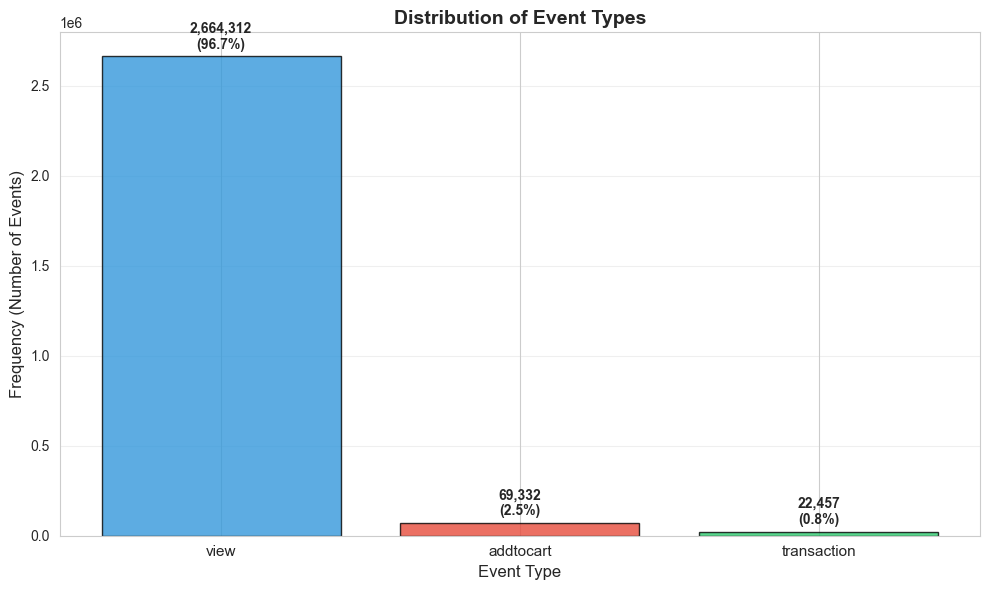


Event Type Distribution:
view: 2,664,312 (96.67%)
addtocart: 69,332 (2.52%)
transaction: 22,457 (0.81%)


In [4]:
# 2. EVENT TYPES FREQUENCY - Understanding behaviour proportions

# Count event types
event_type_counts = events['event'].value_counts()

# Create histogram/bar chart
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = plt.bar(range(len(event_type_counts)), event_type_counts.values, 
               color=colors[:len(event_type_counts)], edgecolor='black', alpha=0.8)

plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Frequency (Number of Events)', fontsize=12)
plt.title('Distribution of Event Types', fontsize=14, fontweight='bold')
plt.xticks(range(len(event_type_counts)), event_type_counts.index, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, event_type_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(event_type_counts)*0.01, 
             f'{value:,}\n({value/len(events)*100:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nEvent Type Distribution:")
for event_type, count in event_type_counts.items():
    percentage = (count / len(events)) * 100
    print(f"{event_type}: {count:,} ({percentage:.2f}%)")

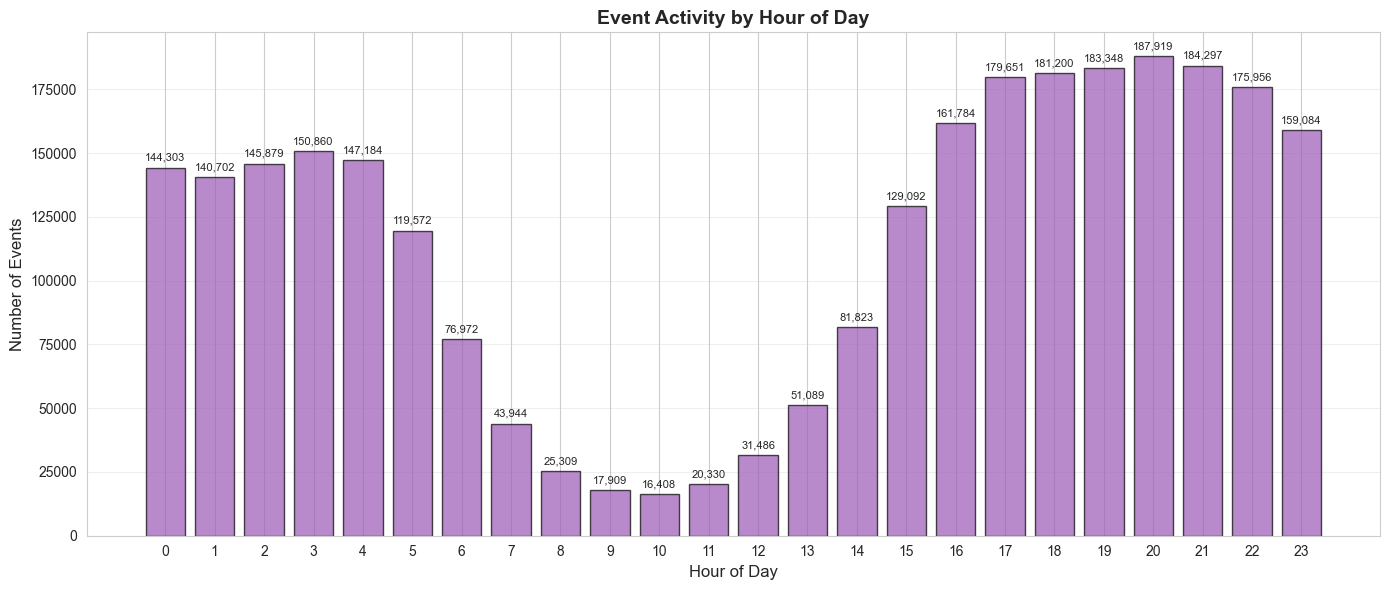

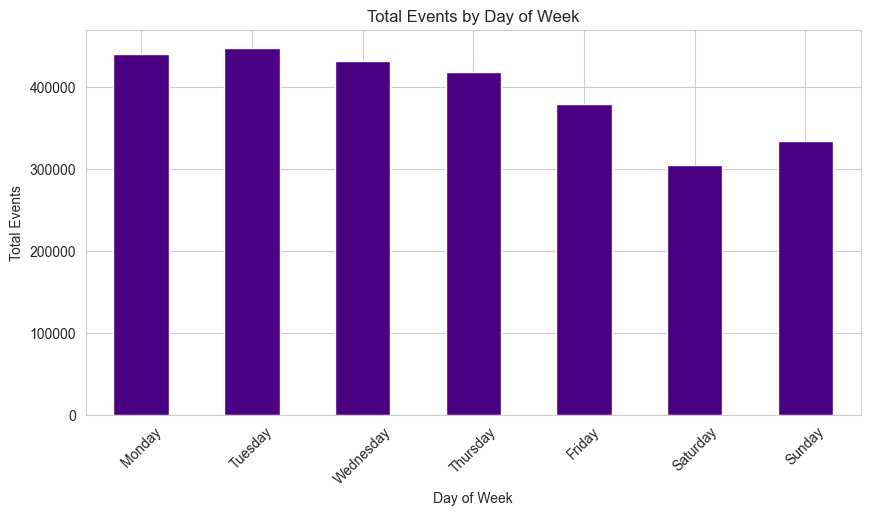


Hourly Activity Statistics:
Peak hour: 20:00
Peak hour events: 187,919
Lowest hour: 10:00
Lowest hour events: 16,408
Average events per hour: 114837.54


In [20]:
# HOUR-OF-DAY ACTIVITY - Understanding temporal browsing patterns

# Count events per hour
hourly_activity = events.groupby('hour').size().reset_index(name='event_count')

# Create histogram
plt.figure(figsize=(14, 6))
plt.bar(hourly_activity['hour'], hourly_activity['event_count'], 
        edgecolor='black', alpha=0.7, color='#9b59b6')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Event Activity by Hour of Day', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24), fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars (optional, may clutter if values are similar)
for i, row in hourly_activity.iterrows():
    plt.text(row['hour'], row['event_count'] + max(hourly_activity['event_count'])*0.01, 
             f"{row['event_count']:,}", 
             ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.show()


# Order for day of week plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 3.1 Events by Day of Week
plt.figure(figsize=(10, 5))
day_counts = events.groupby('dayofweek')['event'].count().reindex(day_order)
day_counts.plot(kind='bar', color='indigo')
plt.title('Total Events by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Events')
plt.xticks(rotation=45)
plt.show()

# Print summary statistics
print("\nHourly Activity Statistics:")
print(f"Peak hour: {hourly_activity.loc[hourly_activity['event_count'].idxmax(), 'hour']}:00")
print(f"Peak hour events: {hourly_activity['event_count'].max():,}")
print(f"Lowest hour: {hourly_activity.loc[hourly_activity['event_count'].idxmin(), 'hour']}:00")
print(f"Lowest hour events: {hourly_activity['event_count'].min():,}")
print(f"Average events per hour: {hourly_activity['event_count'].mean():.2f}")

<Figure size 1400x600 with 0 Axes>

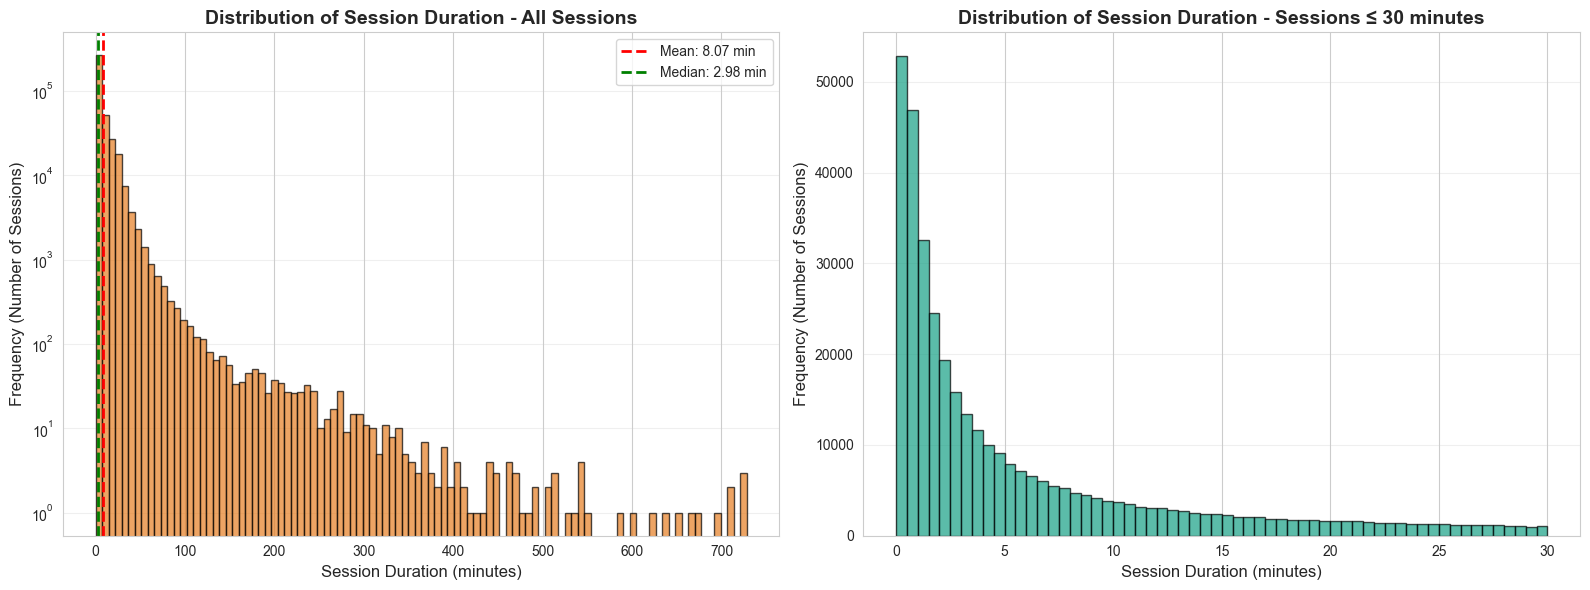


Session Duration Statistics:
Total sessions: 1,761,675
Multi-event sessions: 382,780
Single-event sessions: 1,378,895

For multi-event sessions:
Mean duration: 8.07 minutes
Median duration: 2.98 minutes
Min duration: 0.00 minutes
Max duration: 728.40 minutes
Std deviation: 16.37 minutes

Percentiles:
25th percentile: 0.95 minutes
50th percentile: 2.98 minutes
75th percentile: 9.41 minutes
90th percentile: 21.43 minutes
95th percentile: 29.14 minutes


In [6]:
# 4. HISTOGRAM OF SESSION DURATION

# First, we need to define sessions
# A session is typically defined as a series of events from the same user
# with no more than 30 minutes (1800 seconds) between consecutive events

# Sort events by user and timestamp
events_sorted = events.sort_values(['visitorid', 'timestamp'])

# Calculate time difference between consecutive events for each user
events_sorted['time_diff'] = events_sorted.groupby('visitorid')['timestamp'].diff()

# Define session breaks (30 minutes = 1800000 milliseconds)
SESSION_THRESHOLD = 1800000  # 30 minutes in milliseconds
events_sorted['new_session'] = (events_sorted['time_diff'] > SESSION_THRESHOLD) | (events_sorted['time_diff'].isna())

# Create session IDs
events_sorted['session_id'] = events_sorted.groupby('visitorid')['new_session'].cumsum()
events_sorted['unique_session_id'] = events_sorted['visitorid'].astype(str) + '_' + events_sorted['session_id'].astype(str)

# Calculate session duration (in minutes)
session_stats = events_sorted.groupby('unique_session_id').agg({
    'timestamp': ['min', 'max', 'count']
}).reset_index()

session_stats.columns = ['session_id', 'start_time', 'end_time', 'event_count']
session_stats['duration_minutes'] = (session_stats['end_time'] - session_stats['start_time']) / 60000  # Convert to minutes

# Filter out single-event sessions for duration analysis (they have 0 duration)
session_stats_multi = session_stats[session_stats['event_count'] > 1]

# Create histogram
plt.figure(figsize=(14, 6))

# Most sessions are short, so we'll create two plots: one for all sessions, one zoomed in
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All session durations (log scale)
ax1.hist(session_stats_multi['duration_minutes'], bins=100, edgecolor='black', alpha=0.7, color='#e67e22')
ax1.set_xlabel('Session Duration (minutes)', fontsize=12)
ax1.set_ylabel('Frequency (Number of Sessions)', fontsize=12)
ax1.set_title('Distribution of Session Duration - All Sessions', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.3)

# Add statistics
mean_duration = session_stats_multi['duration_minutes'].mean()
median_duration = session_stats_multi['duration_minutes'].median()
ax1.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.2f} min')
ax1.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.2f} min')
ax1.legend()

# Plot 2: Sessions under 30 minutes (more detailed view)
session_stats_short = session_stats_multi[session_stats_multi['duration_minutes'] <= 30]
ax2.hist(session_stats_short['duration_minutes'], bins=60, edgecolor='black', alpha=0.7, color='#16a085')
ax2.set_xlabel('Session Duration (minutes)', fontsize=12)
ax2.set_ylabel('Frequency (Number of Sessions)', fontsize=12)
ax2.set_title('Distribution of Session Duration - Sessions ≤ 30 minutes', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSession Duration Statistics:")
print(f"Total sessions: {len(session_stats):,}")
print(f"Multi-event sessions: {len(session_stats_multi):,}")
print(f"Single-event sessions: {len(session_stats) - len(session_stats_multi):,}")
print(f"\nFor multi-event sessions:")
print(f"Mean duration: {mean_duration:.2f} minutes")
print(f"Median duration: {median_duration:.2f} minutes")
print(f"Min duration: {session_stats_multi['duration_minutes'].min():.2f} minutes")
print(f"Max duration: {session_stats_multi['duration_minutes'].max():.2f} minutes")
print(f"Std deviation: {session_stats_multi['duration_minutes'].std():.2f} minutes")
print(f"\nPercentiles:")
print(f"25th percentile: {session_stats_multi['duration_minutes'].quantile(0.25):.2f} minutes")
print(f"50th percentile: {session_stats_multi['duration_minutes'].quantile(0.50):.2f} minutes")
print(f"75th percentile: {session_stats_multi['duration_minutes'].quantile(0.75):.2f} minutes")
print(f"90th percentile: {session_stats_multi['duration_minutes'].quantile(0.90):.2f} minutes")
print(f"95th percentile: {session_stats_multi['duration_minutes'].quantile(0.95):.2f} minutes")

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming your DataFrame is loaded as 'events'
# Convert timestamp from milliseconds to datetime object
# This is crucial for temporal analysis
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')

# Extract Temporal Features
events['date'] = events['timestamp'].dt.date
events['dayofweek'] = events['timestamp'].dt.day_name()
events['hour'] = events['timestamp'].dt.hour

In [16]:
# 1.2 Conversion Funnel Flow (based on Unique Visitors)
view_count = events[events['event'] == 'view']['visitorid'].nunique()
addtocart_count = events[events['event'] == 'addtocart']['visitorid'].nunique()
transaction_count = events[events['event'] == 'transaction']['visitorid'].nunique()

print(f"Unique Visitors who viewed: {view_count}")
print(f"Unique Visitors who added to cart: {addtocart_count}")
print(f"Unique Visitors who transacted: {transaction_count}\n")

# Calculate Funnel Conversion Rates
v_to_c_rate = (addtocart_count / view_count) * 100 if view_count > 0 else 0
c_to_t_rate = (transaction_count / addtocart_count) * 100 if addtocart_count > 0 else 0

print(f"View -> AddToCart Conversion Rate (Visitor): {v_to_c_rate:.2f}%")
print(f"AddToCart -> Transaction Conversion Rate (Visitor): {c_to_t_rate:.2f}%")

Unique Visitors who viewed: 1404179
Unique Visitors who added to cart: 37722
Unique Visitors who transacted: 11719

View -> AddToCart Conversion Rate (Visitor): 2.69%
AddToCart -> Transaction Conversion Rate (Visitor): 31.07%


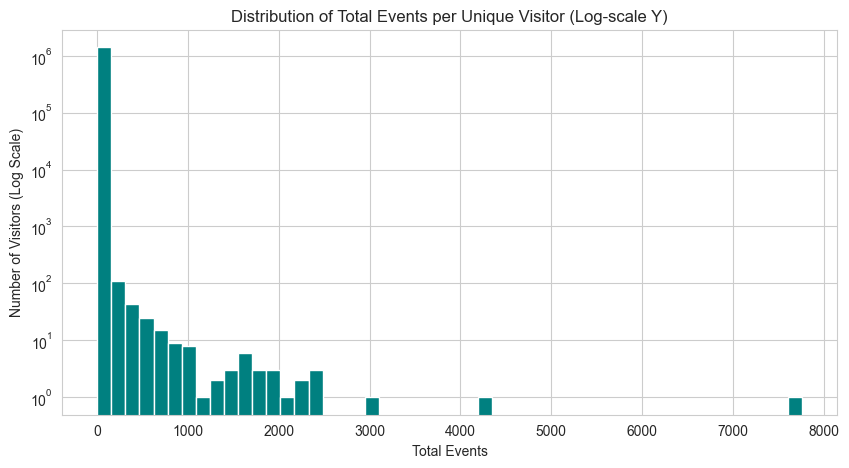

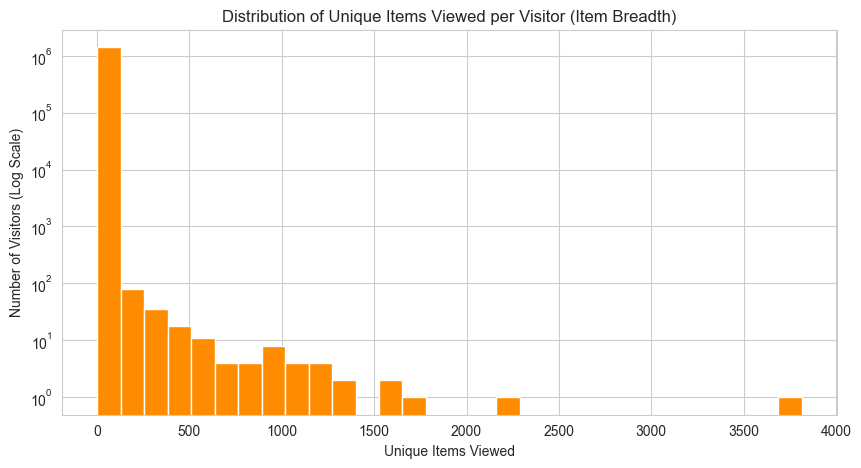


--- Summary of Engineered Features for Clustering ---

       total_events  unique_items_viewed  cart_to_view_ratio  \
count  1.407580e+06         1.407580e+06        1.407580e+06   
mean   1.958042e+00         1.524019e+00        1.359857e-02   
std    1.258049e+01         7.143724e+00        1.294045e-01   
min    1.000000e+00         1.000000e+00        0.000000e+00   
25%    1.000000e+00         1.000000e+00        0.000000e+00   
50%    1.000000e+00         1.000000e+00        0.000000e+00   
75%    2.000000e+00         1.000000e+00        0.000000e+00   
max    7.757000e+03         3.814000e+03        3.100000e+01   

       transaction_to_cart_ratio  
count               1.407580e+06  
mean                7.146007e-03  
std                 8.698107e-02  
min                 0.000000e+00  
25%                 0.000000e+00  
50%                 0.000000e+00  
75%                 0.000000e+00  
max                 1.000000e+01  


In [17]:
# 2. User Behaviour Profiling for Clustering Features

# Group data by visitorid to aggregate event counts and unique items
visitor_features = events.groupby('visitorid').agg(
    total_events=('event', 'count'),
    total_views=('event', lambda x: (x == 'view').sum()),
    total_carts=('event', lambda x: (x == 'addtocart').sum()),
    total_transactions=('event', lambda x: (x == 'transaction').sum()),
    unique_items_viewed=('itemid', 'nunique')
)

# 2.1 User Activity Histogram (Identifying power users/outliers)
plt.figure(figsize=(10, 5))
visitor_features['total_events'].hist(bins=50, log=True, color='teal')
plt.title('Distribution of Total Events per Unique Visitor (Log-scale Y)')
plt.xlabel('Total Events')
plt.ylabel('Number of Visitors (Log Scale)')
plt.show()

# 2.2 Item Breadth Distribution (Identifying browsers vs. goal-oriented)
plt.figure(figsize=(10, 5))
visitor_features['unique_items_viewed'].hist(bins=30, log=True, color='darkorange')
plt.title('Distribution of Unique Items Viewed per Visitor (Item Breadth)')
plt.xlabel('Unique Items Viewed')
plt.ylabel('Number of Visitors (Log Scale)')
plt.show()

# 2.3 Event Ratio Features (Flow Classification Features)
# Use np.where to safely calculate ratios and avoid division by zero (setting ratio to 0 if denominator is 0)
visitor_features['cart_to_view_ratio'] = np.where(
    visitor_features['total_views'] > 0,
    visitor_features['total_carts'] / visitor_features['total_views'],
    0
)

visitor_features['transaction_to_cart_ratio'] = np.where(
    visitor_features['total_carts'] > 0,
    visitor_features['total_transactions'] / visitor_features['total_carts'],
    0
)

print("\n--- Summary of Engineered Features for Clustering ---\n")
print(visitor_features[['total_events', 'unique_items_viewed', 'cart_to_view_ratio', 'transaction_to_cart_ratio']].describe())

# The resulting DataFrame 'visitor_features' is the foundation for your clustering input.

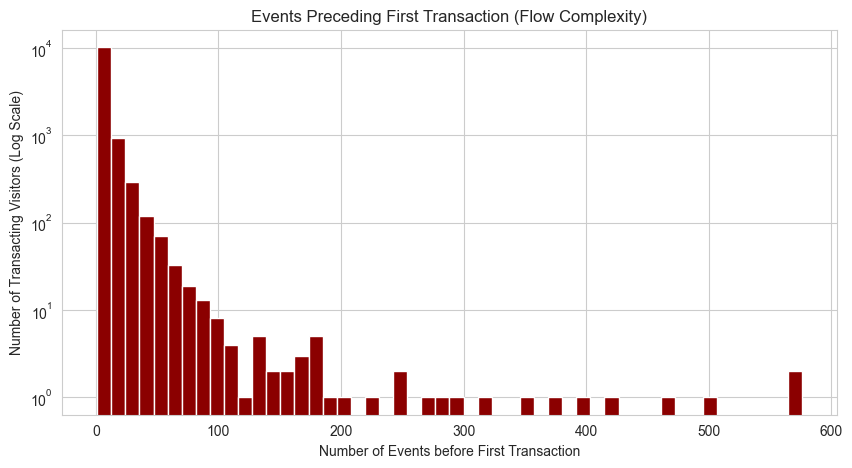


Mean events before first transaction: 8.16
Median events before first transaction: 4


In [19]:
Feature Engineering for Association Rules (Pre-Transaction Flow Complexity)

# Step 1: Sort data to establish event sequence for each visitor
events_sorted = events.sort_values(['visitorid', 'timestamp']).reset_index(drop=True)
events_sorted['event_sequence'] = events_sorted.groupby('visitorid').cumcount() + 1

# Step 2: Identify the sequence number of the FIRST transaction for each visitor
first_transaction = events_sorted[events_sorted['event'] == 'transaction'].groupby('visitorid')['event_sequence'].min().reset_index()
first_transaction.rename(columns={'event_sequence': 'events_to_transact'}, inplace=True)

# Step 3: Merge the feature back into your visitor features table
# (Assuming 'visitor_features' from section 2 is in memory)
visitor_features = visitor_features.merge(
    first_transaction,
    on='visitorid',
    how='left'
)
# For visitors who did not transact, 'events_to_transact' will be NaN

# Step 4: Analyze only transacting users
transacting_users_flow = visitor_features[visitor_features['events_to_transact'].notna()]

plt.figure(figsize=(10, 5))
# Plot the distribution of the number of events that occurred before the first transaction
transacting_users_flow['events_to_transact'].hist(bins=50, log=True, color='darkred')
plt.title('Events Preceding First Transaction (Flow Complexity)')
plt.xlabel('Number of Events before First Transaction')
plt.ylabel('Number of Transacting Visitors (Log Scale)')
plt.show()

print(f"\nMean events before first transaction: {transacting_users_flow['events_to_transact'].mean():.2f}")
print(f"Median events before first transaction: {transacting_users_flow['events_to_transact'].median():.0f}")
# This feature ('events_to_transact') can be used in your clustering model to differentiate between
# 'Quick Converters' and 'Considered Converters'.

General Observations
Event Type Distribution

We have 3 main events,
View : 2,664,312 (96.7% ),
Add to cart : 69,332 events (2.5%)
Transaction : 22,457 events (0.8%) 

WE observe that most users are likely to view items , with only 0.8% actaullly making  a transaction

Session Analysis

Total sessions: 1,761,675
Multi-event sessions: (2+ events): 382,780 (21.7% of total) - shows more than one action carried out 
Single-event sessions: 1,378,895 (78.3% of total) - most likely view only transactions


Visualization insights
The log-scale plot emphasizes that while most sessions are short (<10 minutes), there are rare but significant long-tail sessions, which could represent power users, bots, or data anomalies

Total Events per Visitor: Most users generate very few events, with engagement sharply declining as event count increases — indicating a small core of highly active users.

Unique Items Viewed per Visitor: The majority of users explore only a limited range of items, suggesting narrow browsing behavior across the platform

Skewed Distribution: Most users transact after just a few events, with the median at 4 and mean at 8.16 , indicating a long tail of users who require significantly more interactions before converting.


General Insights
. Users may be casually browsing without deep interaction, which could indicate issues like poor site navigation, irrelevant recommendations,